# SC207 - Social Data Science


# Data exploration and visualisation with Seaborn






## The topic

Data visualisation is both about the presentation of results, but also their analysis. Being able to visualise data in an intuitive way allows us to better understand our data, as well as find trends and patterns that otherwise would not have been apparent to us. There are many libraries for data visualisation in python including...

- Matplotlib - the classic library that many others are built on top of
- Seaborn
- Plotly
- Bokeh

For a great resource on visualisation in Python, visit [The Python Graph Gallery](https://www.python-graph-gallery.com/)

## About Seaborn

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/seaborn_logo.png?raw=true" height=200 align="left">


The Seaborn library is built on top of matplotlib, meaning that it generates figures and objects compatible with the matplotlib library. However, it is designed to make complex analytical plotting simpler with single commands that produce otherwise very complex plots. Seaborn closely integrates with Pandas, making our job even easier.


### The Data

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/RMS_Titanic_3.jpg?raw=true" align="right" width=150>

Today we will be using the Titanic dataset, which provides us information on the pasengers on the ill fated ship, [RMS Titanic](https://en.wikipedia.org/wiki/Titanic). Note that whilst a historical event, you may still find some of the discussion upsetting as we consider age, class, gender, family relations and survival. It is commonly used for teaching data exploration and visualisation, which in itself, is something worth questioning!


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
# We take a look at the data as normal

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### The primary variables in the dataset

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survived | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

##### The seaborn variation adds additional columns such as `alone`, `alive` etc.

### Some possible questions to ask.

- Who were the passengers in terms of age, class, family relations?
- Did class matter when it came to surviving the titanic?
- Did gender matter when it came to surviving the titanic?


Here we make some adjustments to our dataframe. First we make our `pclass` and `alive` variables into categorical variables. This helps Seaborn understand that they are categories rather than numerical values.

Second we make a new column call `n_family` that summarises how many family members a passenger has in total by combining the two types of count.

In [6]:
titanic_df['pclass'] = titanic_df['pclass'].astype('category')
titanic_df['alive'] = titanic_df['alive'].astype('category')
titanic_df['n_family'] = titanic_df['parch'] + titanic_df['sibsp']

# Categorical Plots

In [7]:
# For the distributions we can get the raw figures using .value_counts
titanic_df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [8]:
sns.catplot?

Visualisation can give us a better sense of the difference between the numbers. Seaborns `catplot` (Categorical Plot) can be used for a basic visualisation of simple counts, or the relationship between a numerical and categorical variables.

We can use the `kind` keyword to specify that we want a count plot.

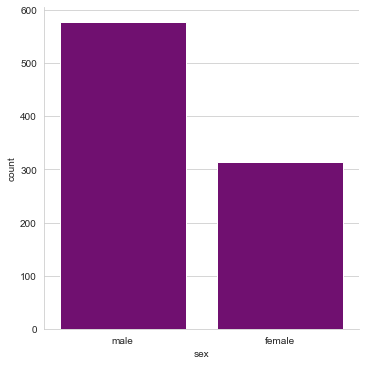

In [9]:
# we use a specific colouring here to avoid conflating the blue, orange and green classes with sex
sns.catplot(data=titanic_df, x='sex', kind='count', color='purple')
sns.despine() # Cleans up the visual a little
plt.show()

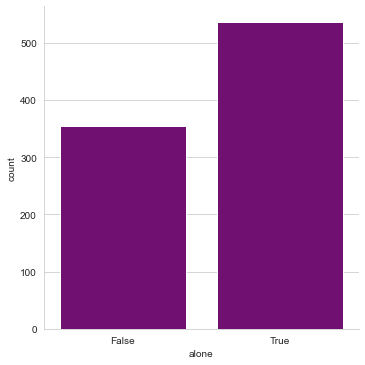

In [10]:
sns.catplot(data=titanic_df, x='alone', kind='count', color='purple')
sns.despine() # Cleans up the visual a little
plt.show()

Going beyond simple counts, `Catplot` can also show us how numerical variables (such as age, fare, number of family members) relate to categorical (Class, sex, survival). Let's look at how the visualisation of age and class varies depending on the type of plot used.

First a strip plot shows us the individual passenger points against the y axis of Age. How far left or right they are within their strip is purely about visibility.

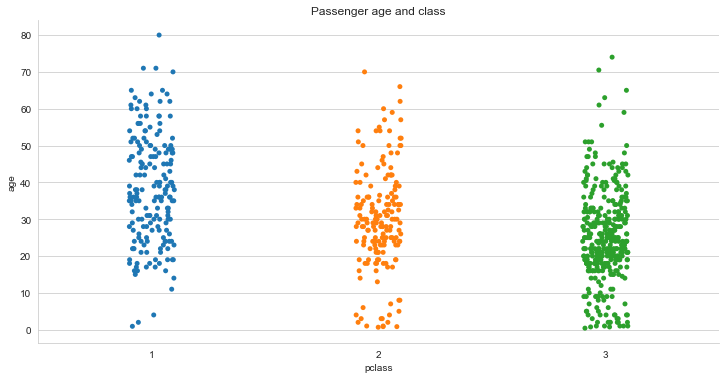

In [11]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='strip', aspect=2)

ax.set(title='Passenger age and class')
sns.despine()
plt.show()

We may get the sense that in general perhaps the lower down in class, the lower your age. But the strip plot struggles to communicate the density of points, just the overall range of ages within each class.

The point plot improves on this by showing us the average age per class with an error bar, indicating the confidence interval (vertical bars) as well as the trend. By setting the hue keyword to `sex` we can generate seperate plots for male and female passengers.

##### What is a confidence interval?
Imagine taking our dataset and randomly sampling some, but not all of the passengers and then working out the average age. Depending on the sample taken sometimes the average age will be higher than than the entire dataset, sometimes lower. The bars indicate that range of differences after sampling many times, so that we can be better informed about how reliable that single point is. Where there is a lot of variation in age the error bars will be bigger.

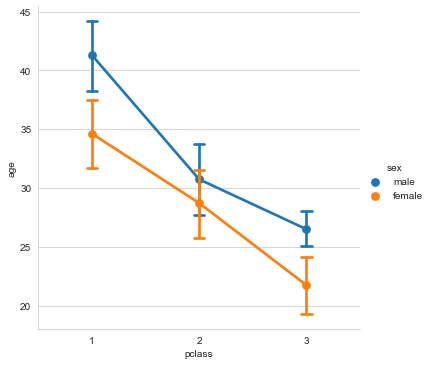

In [12]:
sns.catplot(data=titanic_df, x='pclass', y='age', kind='point', hue='sex', capsize=0.1)
sns.despine()
plt.show()

The point plot disguises the outliers from view as we know from our strip plot, our age range was from 0 to 80, yet our vertical bars aren't telling us the range of ages, but how confident we should be in that average. A box plot would help us better understand the true range of ages, whilst still informing us about the average ages.

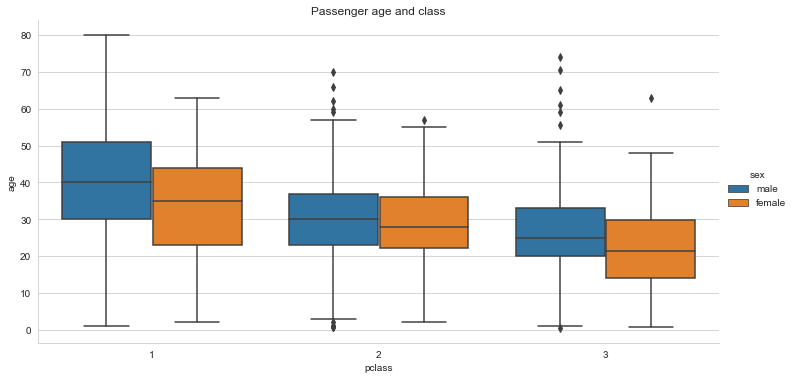

In [13]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='box', hue='sex', aspect=2)

ax.set(title='Passenger age and class')
sns.despine()
plt.show()

The box plot provides us...
- The mean age - middle line of the box
- The age at the 25th percentile - bottom of the box
- The age at the 7th percentile - top of the box
- A sense of the spread - The whiskers show the range of the lowest 25% and the highest 25%.
- Outliers - Determined as individual points that are more than 1.5x higher or lower than the length of the box.

They can however be less interpretable than other categorical plots such as the Boxen plot which gives us a better sense of how many passengers fall into each range of age by plotting the whiskers too...


In [ ]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='boxen',hue='sex', aspect=2)

# ax.set(title='Passenger fare and class')
sns.despine()
plt.show()

## Exercise
In our dataset we have two columns related to family
- `alone` is a boolean column that states whether the passenger was travelling without family.
- `n_family` is the number of family members they are travelling with.

Create two new plots.
- First using `sns.catplot` create a `count` plot (a bar chart) of our variable `alone`. Can you colour your plot by `pclass`?
- Next can you visualise the distribution of `n_family` using a `box` or `boxen` plot. Can you also split this by `pclass`?

Note: Splitting by `pclass` on a `count` plot uses a different keyword argument than it does when using a `box` or `boxen` plot.

# Distributions and Densities

At this point we're getting close to using a categorical plot to understand a distribution. Let's shift over to a different type of plot to better understand this.
Seaborn `displot` is for plotting distributions of values, such as histograms which will bin the values of a column into groups and then count the number of instances of that group.

In [ ]:
# The ? in Jupyter allows us to query the documentation for a method
sns.displot?

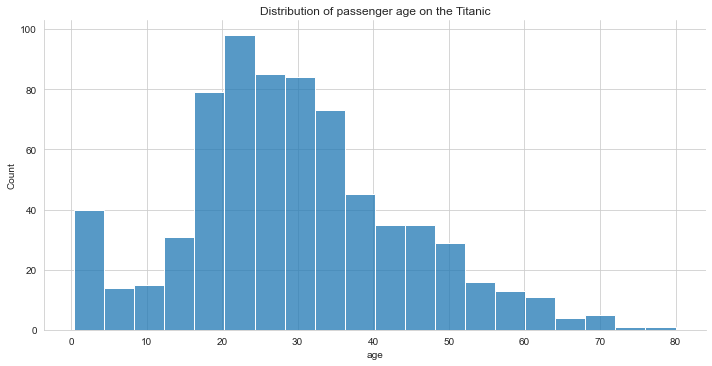

In [14]:
# We can use the height and aspect keywords to control the size of our visual
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2)

# if we assign the result of sns.displot to a variable, we can then make adjustments to it before it is finally produced.
ax.set(title='Distribution of passenger age on the Titanic')
sns.despine()
plt.show()


We can use the `hue` keyword to colour the data by class to give us a better sense of whether the average age of classes differed as well.

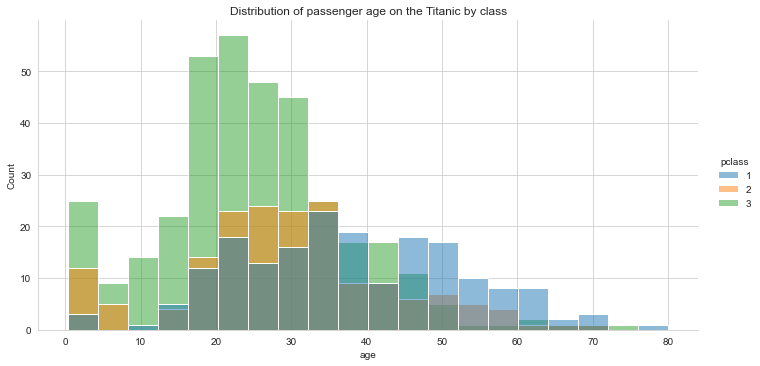

In [15]:
# pass Pclass to hue to seperate the data.
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass')
ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

This helps though it is a bit unclear where the bars overlap in the middle and where the ages begin and end. let's make a few adjustments.
First we'll change the bin size to increments of 5 so each bar represents an age range of 5 years.

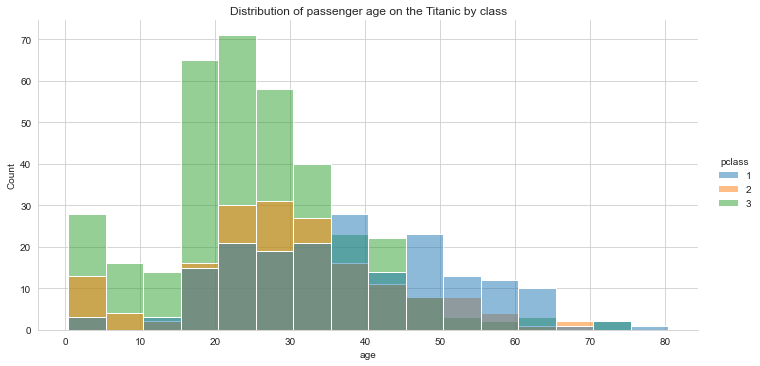

In [16]:
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', binwidth=5)

ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

It's still difficult to tell the overall difference in age distribution by class. Here is where the Kernel Density Estimate can be useful.

A Kernel density estimate indicates the probability that someone within that class will be a particular age.

We can add one to our existing visual using the keyword argument `kde=True`

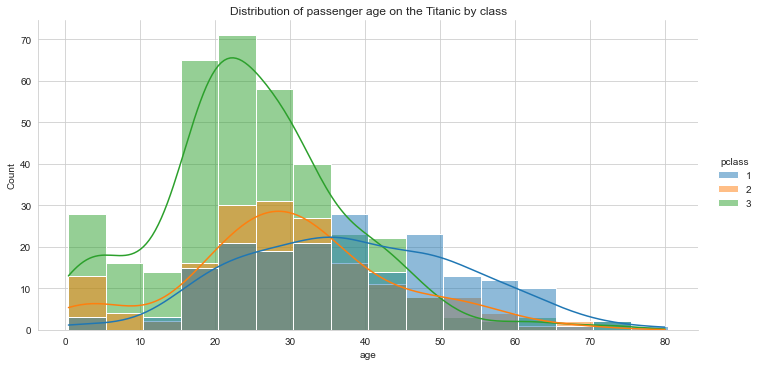

In [17]:
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', binwidth=5, kde=True)

ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

The KDE indicates to us that someone in 3rd class was much more likely to be younger, whilst those in second and first class had a much broader age range, though first class tended to be older than everyone.

In [18]:
# We can roughly check if this makes sense by looking at the mean ages of our different classes using groupby.
titanic_df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

We could clean this up by just relying on the KDE...

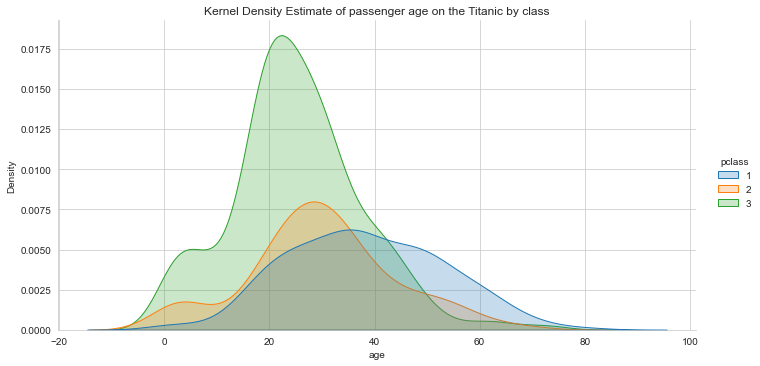

In [19]:
# Rather than add a KDE like before, we change the entire kind of distribution plot to a KDE plot, and fill the area below the lines.

ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', kind='kde', fill=True)

ax.set(title='Kernel Density Estimate of passenger age on the Titanic by class')
sns.despine()
plt.show()


As we can see there are many ways in which to look at the single variable of age. Here we use a different palette to try and distinguish between the class colouring in earlier plots. You can see the different palettes available on the [Seaborn website](https://seaborn.pydata.org/tutorial/color_palettes.html)

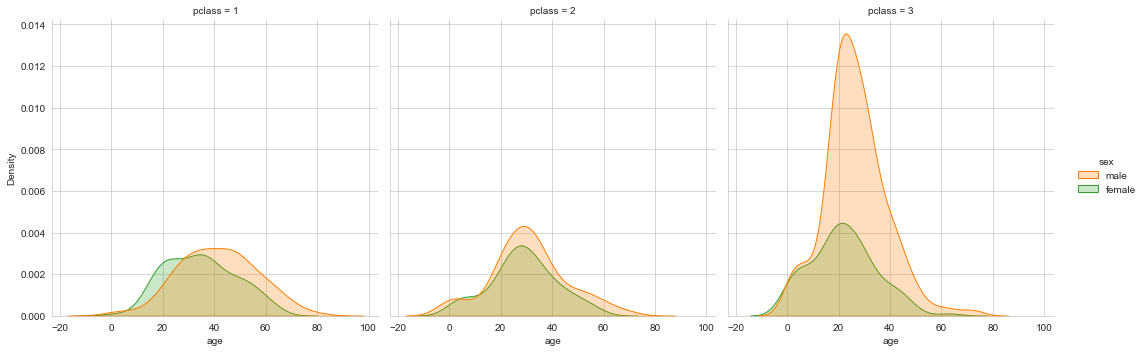

In [20]:
palette = sns.color_palette('Paired_r', n_colors=2)


ax = sns.displot(data=titanic_df, x='age',height=5, aspect=1, hue='sex', kind='kde',col='pclass', fill=True, palette=palette)

# ax.set(title='Kernel Density Estimate of passenger age on the Titanic by sex')
sns.despine()
plt.show()


Worth noting that one of the categorical plots we did not show, also uses KDE, the violin plot.

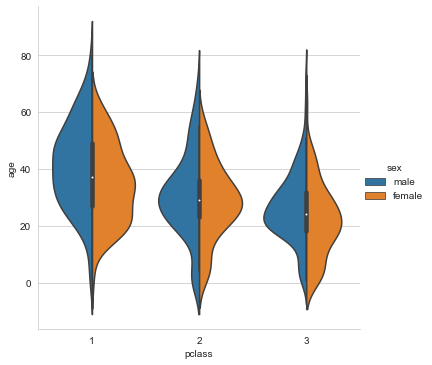

In [21]:
sns.catplot(data=titanic_df, x='pclass', y='age', hue='sex', split=True, kind='violin')
sns.despine()

## Exercise

Can you plot the distribution of `n_family` using a histogram?
- Would it be better as a KDE?
- You might also trying splitting the data by `pclass`. You could do this using the `hue` keyword argument.
- You might also want to test out the `col` keyword argument. Set both `hue` and `col` to `pclass`. Experiment and see.

In [ ]:
# Exercise Code here - add more cells as needed





# Relationships and trends

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/spurious_chart.png?raw=true" height=400 align="right">

##### Predicting space launches via Sociology doctorates - from [Spurious Correlations](http://www.tylervigen.com/spurious-correlations) by Tyler Vigen.


Visualising the right way allows us to better understand the relationships between different variables. Often in data science it is framed as prediction. Using a set of known variables to predict a hitherto unknown outcome. In social science we are less interested in the prediction, and more interested in understanding why particular variables are predictive.

Never take predictive relationships at face value, always seek to explain them.

## Heatmaps
Is there a quick way to visualise the differences in survival rates across sex and class?
First we need to generate the numbers. Remember the survival column is either 1 for survived or 0 for did not survive.

If we take the mean value of the survived column, that gives us the average survival rate as the 1's push the value up, and the 0's bring the value down.

In [22]:
titanic_df['survived'].mean()

0.3838383838383838

So the average survival rate is 38%, i.e. 38% of people survived...

In [23]:
# We can show this using a standard percentage calculation, the number of people who survived divided by the total number of people.
titanic_df['survived'].sum() / titanic_df['survived'].count()

0.3838383838383838

But is this uniformly spread across passengers or did different factors impact survival?
Let's do that survival calculation again, but this time split the data up by `sex` and `pclass` first.

In [24]:
# First we need to generate the numbers
class_sex_survival = titanic_df.groupby(['class','sex'])['survived'].mean()
class_sex_survival

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

To be the right shape for a heatmap we need the index to be class, and the columns to be male and female. Currently we have two indexes (known in Pandas as a multiindex), a `pclass` index and a `sex` index.
`.unstack()` will turn one of the indexes into column labels instead, and reshape the data.

In [25]:
heatmap_data = class_sex_survival.unstack()
heatmap_data

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


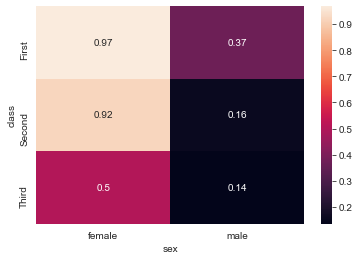

In [26]:
# A very basic heatmap
sns.heatmap(data=heatmap_data, annot=True)
plt.show()

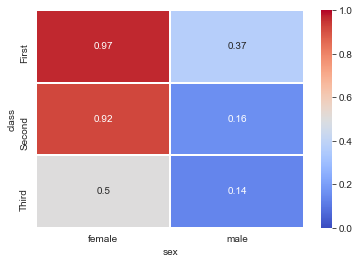

In [27]:
# We can improve it by changing the colour scale

sns.heatmap(data=heatmap_data, annot=True, linewidths=0.3, vmin=0, vmax=1, center=0.5, cmap='coolwarm')
plt.show()

We can see the impact that both class and sex had on survival rate. What might some of our explanations be? One might hypothesise that class improves with age as we accumulate wealth, and that elderly people were helped by other passengers. Let's explore this further...

A `lmplot` is a basic scatter and line plot but it has some interesting features. First let's plot age against survival just to see the most basic result.

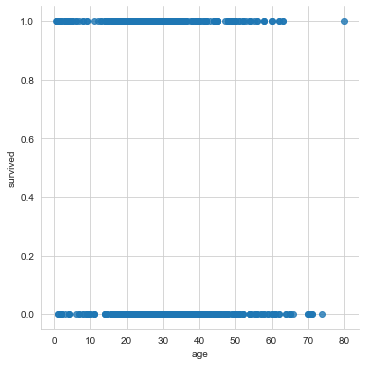

In [28]:
sns.lmplot(x='age',y='survived', data=titanic_df, fit_reg=False)
sns.despine()
plt.show()

Not particularly useful. Our binary survival values of 0 or 1 means that it's very difficult to discern anything. Let's try seperating out the classes.

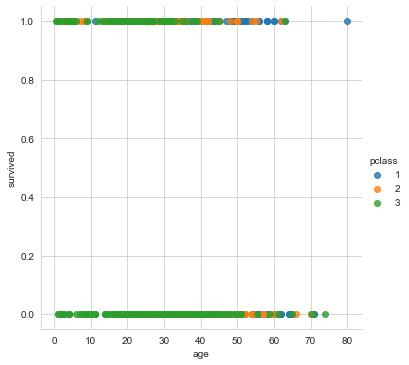

In [29]:
sns.lmplot(x='age',y='survived', data=titanic_df, fit_reg=False, hue='pclass')
sns.despine()
plt.show()

Ok, maybe on average there are older people in 1st and 2nd class, but it's hard to tell as all the points overlap, let's fix that.

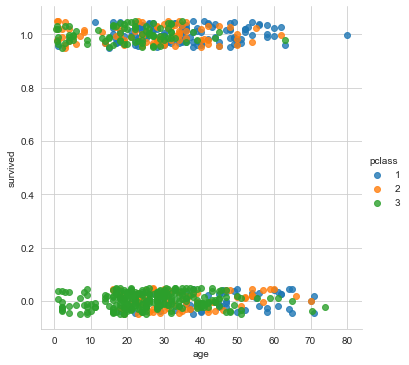

In [30]:
sns.lmplot(x='age',y='survived', data=titanic_df, fit_reg=False, hue='pclass', y_jitter=0.05)
sns.despine()
plt.show()

What about our grouping by `sex` as well? We can't use colouring to do it, but we can split up the data better. Let's split the data so that we have individual plots for class and sex similar to our heatmap.

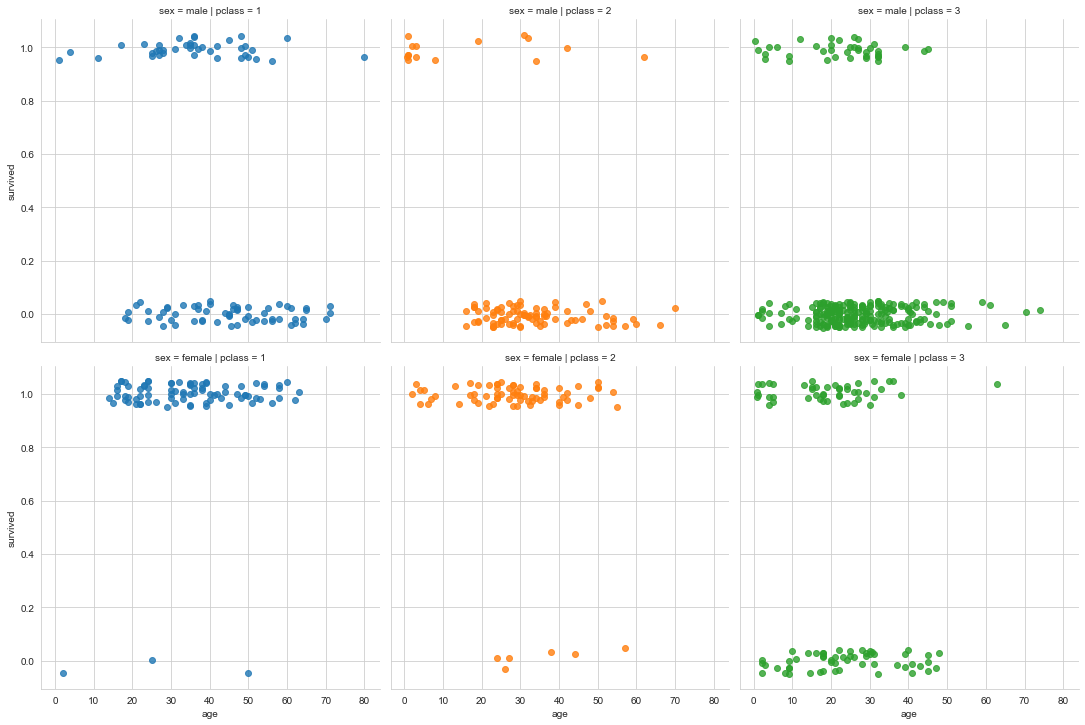

In [31]:
sns.lmplot(x='age',y='survived', data=titanic_df, fit_reg=False, hue='pclass', y_jitter=0.05,row='sex', col='pclass')
sns.despine()
plt.show()

Ok! Now we can see some trends. In terms of the density of points - female passengers tended to survive apart from in 3rd class. Male passengers tended not to, but you had a greater chance in 1st class. However it is still hard to compare and we still don't really know much about the impact of age.

We can solve this by allowing seaborn to draw us a regression line. The regression line will predict for us, given the age of the person their liklihood of survival, and it will produce one for each scenario. One thing to keep in mind, this is a logistic regeression, as it is predicting one of two outcomes, unlike a normal regression which tries to predict a value based on another value.

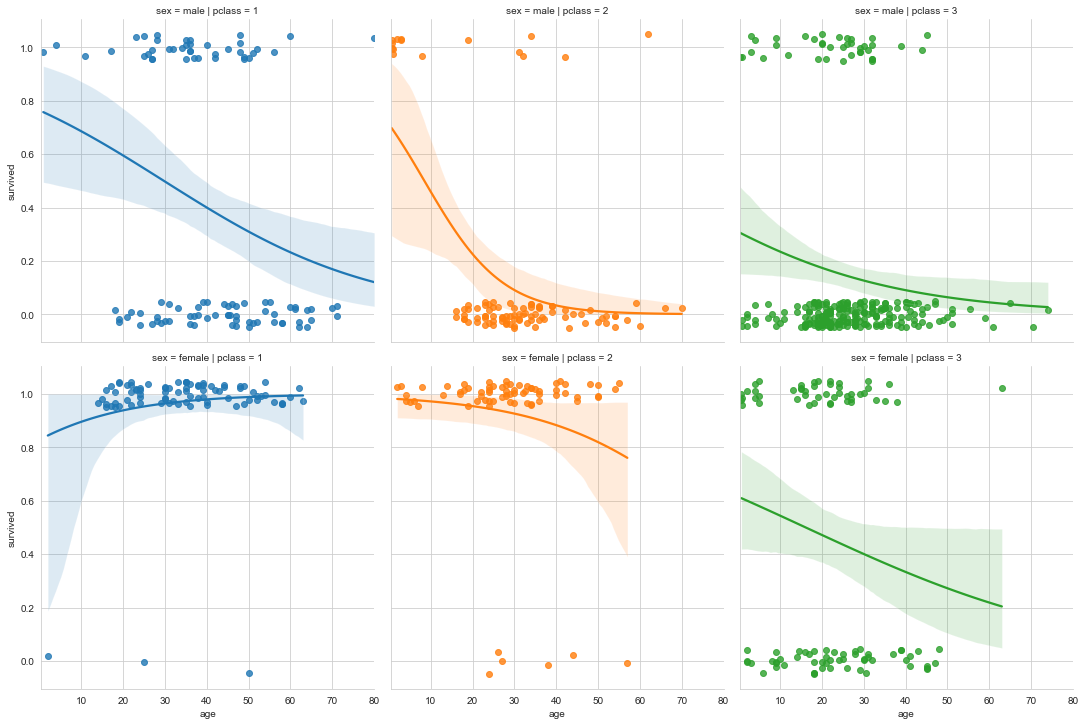

In [32]:
sns.lmplot(x='age',y='survived', data=titanic_df, hue='pclass', y_jitter=0.05, row='sex', col='pclass', fit_reg=True, logistic=True)
sns.despine()
plt.show()

#### Interpreting our plots

The line on each plot represents the probability of survival given a particular age. It is a smoothing out of the trends so that we can get a sense of the trend and make the sub-plots (each sex/class scenario) comparable. The shaded area around each line represents the confidence interval. The confidence the tighter or thinner the shaded area the greater confidence we can have in the prediction, because there is a substantial number of samples (passengers) and the trend is very clear.

For example take the scenario `female|pclass 1` (bottom left). For ages 0-10 we have a very wide confidence interval from 0.2 to 1.0 because there are so few samples. However by age 15 we see the confidence improve as far more samples are available, and the vast majority are passengers that survived.

Some age trend observations...
- For women, there is a clear class distinction. For 1st and second class women the number of those that did not survive is low, making it difficult to produce clear trends in relation to age. Third class women were worst off with a broad drop in survival with age.
- For men in 1st class survival does descend with age, but there is a greater chance of survival overall. 2nd class boys were likely to survive but survivability took a sharp drop after the age of 10. 3rd class men had the overall worst survivability with age making only a small difference.

## Exercise
Using a `sns.lmplot` explore the relationship between survival and the number of family members a person had.
- Use the `n_family` column in our dataset.
- Experiment with splitting the data by `hue`, `col` and `row`.

In [ ]:
# Exercise code here - create more cells if needed.

# Exporting

In [ ]:
# The standard syntax for exporting a seaborn plot to an image file is...

sns.catplot(data=titanic_df, x='pclass', y='age', kind='point', hue='sex', capsize=0.1)
sns.despine()


plt.tight_layout()
fig = plt.gcf()
fig.savefig('class_age_catplot.png', dpi=300)

# Conclusion
There are many more types of plotting available to us via Seaborn. You'll find more examples and how to use them in Ch.7 of the textbook, the official [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html), and in [The Python Graph Gallery](https://www.python-graph-gallery.com/).